# K-Nearest Neighbors (KNN) Classification

This notebook demonstrates KNN classification using weight and height data.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [69]:
# Load the KNN dataset
df = pd.read_csv('knn.csv')

# Display first few rows
print(df.head())
print(f"\nDataset shape: {df.shape}")
print("Class distribution:")
print(df['Class'].value_counts())

   Weight(x2)  Height(y2)        Class
0          51         167  Underweight
1          66         177       Normal
2          75         169   Overweight
3          69         176       Normal
4          50         173  Underweight

Dataset shape: (25, 3)
Class distribution:
Class
Normal         10
Underweight     8
Overweight      7
Name: count, dtype: int64


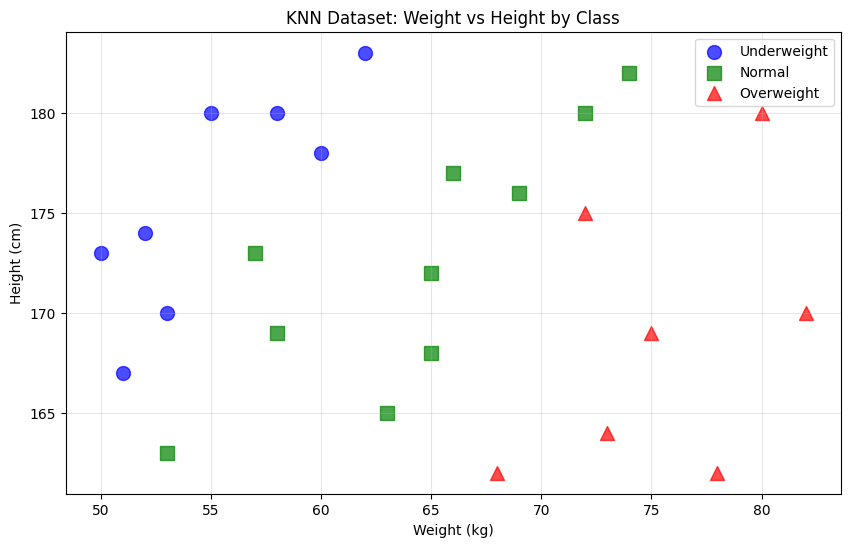

In [70]:
# Visualize the data points
plt.figure(figsize=(10, 6))

# Create a scatter plot with different colors for each class
classes = df['Class'].unique()
colors = {'Underweight': 'blue', 'Normal': 'green', 'Overweight': 'red'}
markers = {'Underweight': 'o', 'Normal': 's', 'Overweight': '^'}

for cls in classes:
    data = df[df['Class'] == cls]
    plt.scatter(data['Weight(x2)'], data['Height(y2)'], 
                c=colors[cls], marker=markers[cls], 
                label=cls, alpha=0.7, s=100)

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('KNN Dataset: Weight vs Height by Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [71]:
# Prepare data for KNN

# Extract features and labels
X = df[['Weight(x2)', 'Height(y2)']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Find best value of k

# Test different k values
k_values = range(1, 16)  # Test k from 1 to 15
accuracies = []

for k in k_values:
    # Train KNN with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_k = knn.predict(X_test_scaled)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

    print(f"k={k}: Accuracy = {acc:.2%}")

# Find best k
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"\nBest k = {best_k} with accuracy = {best_accuracy:.2%}")

# Update the model with best k
k = best_k
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

print(f"\nFinal Model Performance (k={k}):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")

k=1: Accuracy = 60.00%
k=2: Accuracy = 60.00%
k=3: Accuracy = 60.00%
k=4: Accuracy = 60.00%
k=5: Accuracy = 80.00%
k=6: Accuracy = 40.00%
k=7: Accuracy = 60.00%
k=8: Accuracy = 60.00%
k=9: Accuracy = 60.00%
k=10: Accuracy = 80.00%
k=11: Accuracy = 60.00%
k=12: Accuracy = 60.00%
k=13: Accuracy = 40.00%
k=14: Accuracy = 40.00%
k=15: Accuracy = 40.00%

Best k = 5 with accuracy = 80.00%

Final Model Performance (k=5):
Accuracy: 80.00%


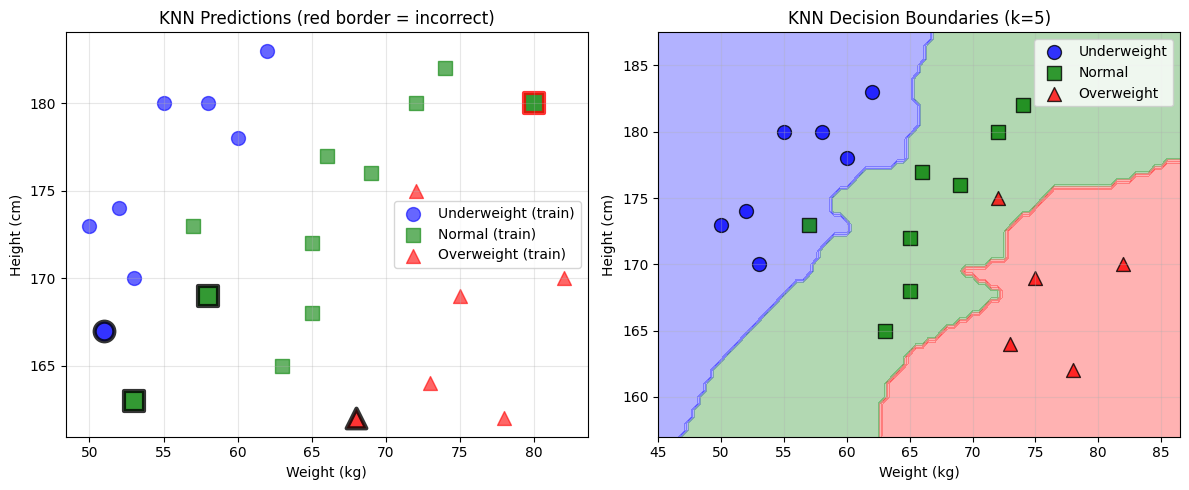

In [73]:
# Visualize decision boundaries

plt.figure(figsize=(12, 5))

# Plot 1: Original data with test predictions
plt.subplot(1, 2, 1)
for cls in classes:
    mask = y_train == cls
    plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                c=colors[cls], marker=markers[cls], 
                label=f'{cls} (train)', alpha=0.6, s=100)

# Plot test predictions
for i, (x, y_true, y_p) in enumerate(zip(X_test, y_test, y_pred)):
    marker_style = markers[y_p]
    color = colors[y_p]
    edge_color = 'black' if y_true == y_p else 'red'
    plt.scatter(x[0], x[1], c=color, marker=marker_style, 
                s=200, edgecolors=edge_color, linewidths=3, alpha=0.8)

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('KNN Predictions (red border = incorrect)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Decision boundary
plt.subplot(1, 2, 2)
h = 0.5  # step size in the mesh
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5 
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the mesh
Z = knn_model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_numeric = np.array([list(classes).index(z) for z in Z])
Z_numeric = Z_numeric.reshape(xx.shape)

plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=ListedColormap(['blue', 'green', 'red']))

# Plot training points
for cls in classes:
    mask = y_train == cls
    plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                c=colors[cls], marker=markers[cls], 
                label=cls, alpha=0.8, s=100, edgecolors='black')

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title(f'KNN Decision Boundaries (k={k})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()